## Homework

In [14]:
import pandas as pd
import numpy as np

In [49]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [50]:
sel_features = ['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [51]:
df = df[sel_features]

In [52]:
df.y = (df.y == "yes").astype(int)

In [53]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

del df_train["y"]
del df_val["y"]
del df_test["y"]

In [56]:
df_train.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,entrepreneur,married,tertiary,40,no,cellular,11,jul,123,2,-1,0,unknown
1,33,technician,married,secondary,4790,yes,cellular,20,apr,137,1,272,2,failure
2,32,technician,single,tertiary,392,yes,cellular,21,nov,148,2,-1,0,unknown
3,40,admin.,divorced,secondary,2129,no,cellular,30,apr,452,1,-1,0,unknown
4,54,unemployed,married,tertiary,1180,no,cellular,19,nov,394,2,-1,0,unknown


### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `y` variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `balance`
- `day`
- `duration`
- `previous`

In [57]:
from sklearn.metrics import roc_auc_score

In [58]:
roc_auc_score(y_train, df_train["balance"])

np.float64(0.5888313805382317)

In [60]:
roc_auc_score(y_train, -df_train["day"])

np.float64(0.525957882383908)

In [61]:
roc_auc_score(y_train, df_train["duration"])

np.float64(0.8147002759670778)

In [62]:
roc_auc_score(y_train, df_train["previous"])

np.float64(0.5985653242764153)

### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.69
- 0.79
- 0.89
- 0.99


In [63]:
from sklearn.feature_extraction import DictVectorizer

In [64]:
train_dicts = df_train.to_dict(orient="records")
train_dicts[0]

{'age': 56,
 'job': 'entrepreneur',
 'marital': 'married',
 'education': 'tertiary',
 'balance': 40,
 'housing': 'no',
 'contact': 'cellular',
 'day': 11,
 'month': 'jul',
 'duration': 123,
 'campaign': 2,
 'pdays': -1,
 'previous': 0,
 'poutcome': 'unknown'}

In [65]:
dv = DictVectorizer(sparse=False) # Create instance of class
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [66]:
X_train = dv.transform(train_dicts)

In [67]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [68]:
val_dicts = df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)

In [69]:
y_pred = model.predict_proba(X_val)[:,1]

In [70]:
roc_auc_score(y_val, y_pred)

np.float64(0.9000611291793008)

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.265
* 0.465
* 0.665
* 0.865

In [71]:
def prec_rec(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0,1, 101)
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
    
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
    
        scores.append((t, tp, fp, fn, tn))
    
    columns = ["threshold", "tp", "fp", "fn", "tn"]
    df_scores = pd.DataFrame(scores, columns=columns)
    
    df_scores["p"] = df_scores.tp / (df_scores.tp + df_scores.fp)
    df_scores["r"] = df_scores.tp / (df_scores.tp + df_scores.fn)

    return df_scores

In [72]:
df_score = prec_rec(y_val, y_pred)

In [74]:
df_score[]

,threshold,tp,fp,fn,tn,p,r
0,0.00,1098,7944,0,0,0.121433,1.000000
1,0.01,1094,6977,4,967,0.135547,0.996357
2,0.02,1093,5788,5,2156,0.158843,0.995446
3,0.03,1087,4763,11,3181,0.185812,0.989982
4,0.04,1067,3832,31,4112,0.217800,0.971767
...,...,...,...,...,...,...,...
96,0.96,31,17,1067,7927,0.645833,0.028233
97,0.97,24,15,1074,7929,0.615385,0.021858
98,0.98,20,10,1078,7934,0.666667,0.018215
99,0.99,10,6,1088,7938,0.625000,0.009107


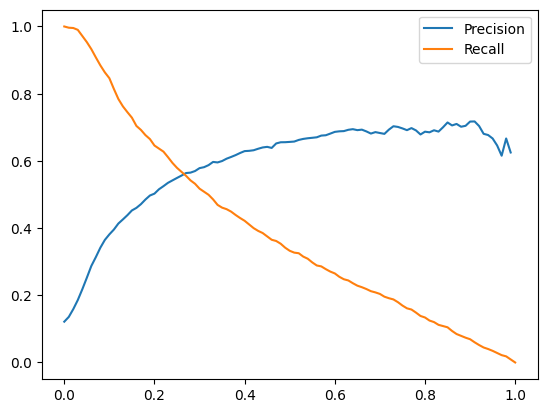

In [76]:
import matplotlib.pyplot as plt

plt.plot(df_score.threshold, df_score.p, label="Precision")
plt.plot(df_score.threshold, df_score.r, label="Recall")
plt.legend()

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.02
- 0.22
- 0.42
- 0.62

In [78]:
df_score['F1'] = 2 * df_score.p * df_score.r / (df_score.p + df_score.r)
df_score

,threshold,tp,fp,fn,tn,p,r,F1
0,0.00,1098,7944,0,0,0.121433,1.000000,0.216568
1,0.01,1094,6977,4,967,0.135547,0.996357,0.238630
2,0.02,1093,5788,5,2156,0.158843,0.995446,0.273969
3,0.03,1087,4763,11,3181,0.185812,0.989982,0.312896
4,0.04,1067,3832,31,4112,0.217800,0.971767,0.355845
...,...,...,...,...,...,...,...,...
96,0.96,31,17,1067,7927,0.645833,0.028233,0.054101
97,0.97,24,15,1074,7929,0.615385,0.021858,0.042216
98,0.98,20,10,1078,7934,0.666667,0.018215,0.035461
99,0.99,10,6,1088,7938,0.625000,0.009107,0.017953


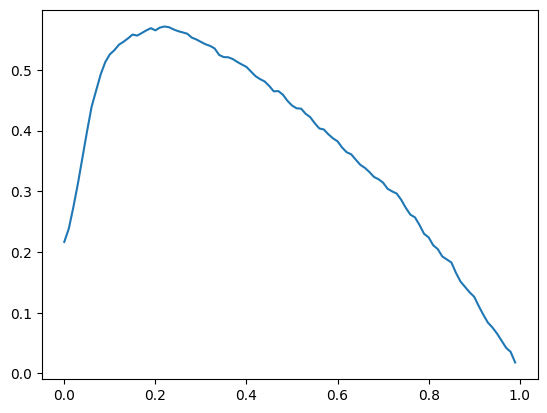

In [81]:
plt.plot(df_score.threshold, df_score.F1)
plt.show()

### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.26

In [86]:
def train(df_train, y_train):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [87]:
from sklearn.model_selection import KFold

In [91]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.y
    y_val = df_val.y

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.5f +- %.5f' % (np.mean(scores), np.std(scores)))

1.00000 +- 0.00000


### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [92]:
def train(df_train, y_train, C):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [97]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.000001, 0.001, 1]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.y
        y_val = df_val.y

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C = %.6f, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C = 0.000001, 0.702 +- 0.009
C = 0.001000, 0.987 +- 0.003
C = 1.000000, 1.000 +- 0.000
